In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.size

117513

In [7]:
df.shape

(10683, 11)

AttributeError: 'DataFrame' object has no attribute 'gender'

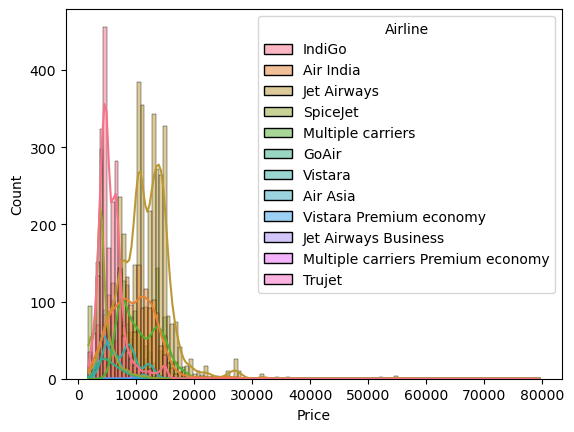

In [1]:
#Q-2:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('flight_price.xlsx')
df.head()
sns.histplot(data=df,x='Price',kde=True,hue='Airline')
sns.histplot(data=df[df.gender=='Price'],x='average',kde=True,hue='Airline')


In [2]:
#Q-3:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('flight_price.xlsx')
data=df[['Price']]
data
range = np.ptp(data)
print("Range:", range)

# calculate the minimum value
min_val = np.min(data)
print("Minimum value:", min_val)

# calculate the maximum value
max_val = np.max(data)
print("Maximum value:", max_val)


Range: Price    77753
dtype: int64
Minimum value: Price    1759
dtype: int64
Maximum value: Price    79512
dtype: int64


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:279: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:280: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  umr_minimum(a, axis, None, None, keepdims),
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a

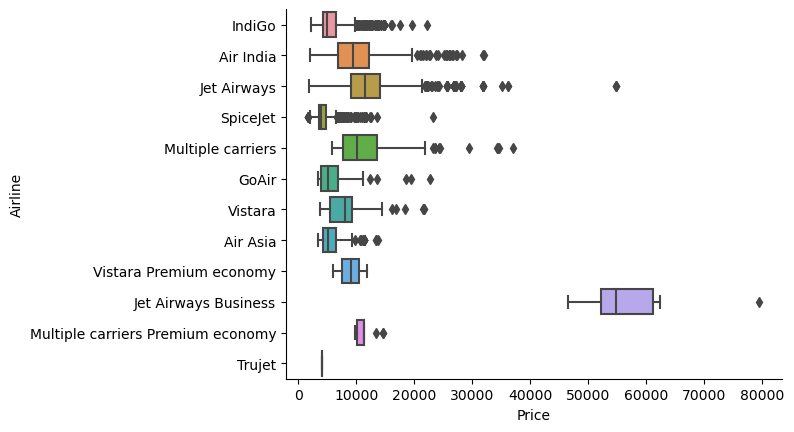

In [3]:
#Q-4:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('flight_price.xlsx')
df.head()

# create box plot
sns.boxplot(x="Price", y="Airline", data=df)
sns.despine()


Outliers:
                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396      

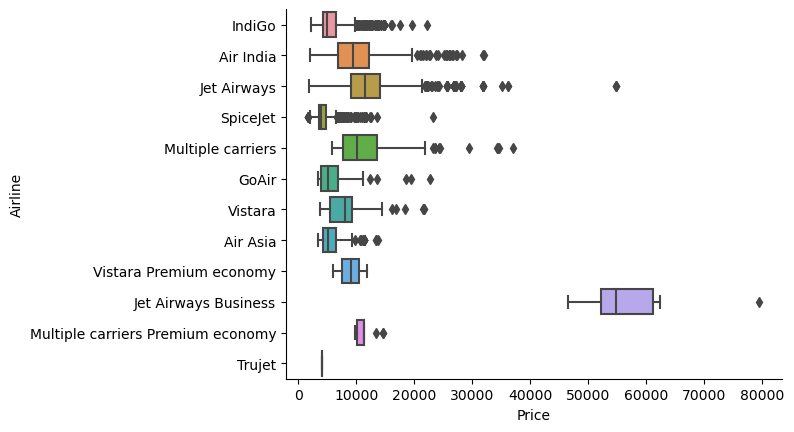

In [4]:
#Q-5:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('flight_price.xlsx')
df.head()
sns.boxplot(x="Price", y="Airline", data=df)
sns.despine()

# identify outliers
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
print("Outliers:")
print(outliers)

# analyze outliers
mean = df["Price"].mean()
std = df["Price"].std()

for idx, row in outliers.iterrows():
    if row["Price"] > mean + 2*std:
        print("High outlier detected:", row["Price"])
    elif row["Price"] < mean - 2*std:
        print("Low outlier detected:", row["Price"])



In [ ]:
#Q-6:
 To analyze the peak season for flight data, you can use several different
approaches depending on the available data and the specific question you 
want to answer. Here are some general steps you can follow:

Gather flight data: Collect flight data for several years, including the 
number of flights, flight routes, flight times, and ticket prices.

Visualize flight data: Use graphs and charts to visualize flight data to
identify patterns and trends. For example, you can create line graphs to 
show the number of flights and ticket prices over time, scatterplots to
show the relationship between flight routes and ticket prices, or bar
charts to compare the number of flights between different months or seasons.

Identify peak seasons: Use the visualized flight data to identify the 
peak season for flights. Look for patterns and trends in flight data 
to identify the months or seasons when the number of flights is highest
and ticket prices are highest or lowest. You can also analyze flight data 
by regions or specific flight routes to identify peak seasons for those flights.

Analyze the reasons for peak seasons: Once you have identified peak seasons,
try to understand the reasons behind them. For example, peak seasons for 
flights may be due to seasonal factors like holidays, festivals, or weather 
conditions. You can also analyze the reasons for the price changes during the peak season.

Plan for future peak seasons: Use the analysis to plan for future peak seasons. 
For example, airlines can adjust their flight schedules and prices during peak 
seasons to meet the demand.

Overall, analyzing the peak season for flight data involves collecting and 
visualizing flight data, identifying peak seasons, analyzing the reasons for
the peak seasons, and planning for future peak seasons based on the analysis. 
By following these steps, you can gain insights into the patterns and trends 
in flight data and use them to make informed decisions.


In [ ]:
#Q-7:
To identify trends in flight prices using Python, several features can be analyzed. Here are some key features to consider:

1. Date and Time: Analyzing flight prices over time can reveal seasonal patterns, such as price variations based on the month, day of the week, or time of day. It can also help identify trends related to holidays, peak travel seasons, or off-peak periods.

2. Route: The specific origin and destination routes can significantly impact flight prices. Analyzing prices based on different routes or airport combinations can help identify cost variations and trends.

3. Airline: Different airlines may have varying pricing strategies and fare structures. Analyzing prices across different airlines can provide insights into the competitive landscape and pricing patterns.

4. Duration and Stopovers: The duration of a flight and the number of stopovers can influence prices. Analyzing prices based on flight durations and the presence or absence of stopovers can help identify trends related to convenience and travel preferences.

5. Class and Cabin Type: Prices can vary based on the class of travel (economy, business, first class) and the type of cabin (e.g., economy, premium economy). Analyzing price trends across different classes and cabin types can provide insights into the price differentials and passenger preferences.

6. Advance Booking: The lead time or advance booking period can affect flight prices. Analyzing prices based on the number of days or weeks before the departure date can reveal trends related to early bird discounts, last-minute fares, or optimal booking windows.

7. Demand and Availability: Analyzing flight prices in relation to factors such as seat availability, booking trends, or demand spikes (e.g., for popular events or festivals) can provide insights into pricing dynamics.

8. Additional Features: Depending on the dataset, other features such as flight distance, airport facilities, flight ratings, or historical price trends may also be relevant for analysis.

To analyze these features and identify trends in flight prices, we can use Python libraries like pandas, matplotlib, and seaborn. Load your dataset into a pandas DataFrame, perform data preprocessing and exploratory data analysis, and use visualizations and statistical techniques to identify trends and patterns in flight prices over time and across different features.

In [ ]:
#Q-8:
Analyzing the factors affecting flight prices can help you understand why prices 
vary and can help you make informed decisions about when and how to book a flight.
Here are some steps to follow when analyzing the factors affecting flight prices:

Gather flight data: Collect flight data for several years, 
including information on flight routes, airlines, departure and arrival times, ticket prices, and other
relevant factors. 
Clean and preprocess the data: Clean the data by removing any missing values or errors. 
You can also preprocess the data by converting it into a structured format, grouping the 
data by route or airline, or adjusting the prices for inflation.

Identify relevant factors: Identify the factors that may affect flight prices, such as season, 
day of the week, time of day, airline, route, and demand. You can use statistical techniques 
such as correlation analysis or regression analysis to identify the factors that have the strongest
relationship with flight prices.

Visualize the data: Use charts and graphs to visualize the data and identify any patterns or 
relationships between factors and flight prices. For example, you can create scatterplots to 
show the relationship between flight prices and demand, or line graphs to show the average
prices for different routes over time.

Analyze the data: Use statistical techniques such as regression analysis to analyze the data
and identify the factors that have the strongest relationship with flight prices. You can also 
use machine learning algorithms to build predictive models that can forecast flight prices based
on historical data.

Interpret the results: Once you have identified the factors affecting flight prices, interpret
the results to gain insights into how these factors impact flight prices. For example, you may 
find that flight prices are generally lower during certain months of the year, or that prices 
are higher on certain days of the week or for certain airlines.

Use the analysis to make decisions: Use the insights gained from the analysis to make informed 
decisions. For example, if you find that flight prices are generally lower during certain months 
of the year, you can plan your travel accordingly. Alternatively, airlines can adjust their
pricing strategies to optimize revenue based on the identified factors.

Overall, analyzing the factors affecting flight prices involves gathering and preprocessing
flight data, identifying relevant factors, visualizing the data, analyzing the data, 
interpreting the results, and using the analysis to make informed decisions. 
By following these steps, you can gain insights into the factors affecting 
flight prices and use them to make informed decisions.

In [5]:
#Q-9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.shape

(10841, 13)

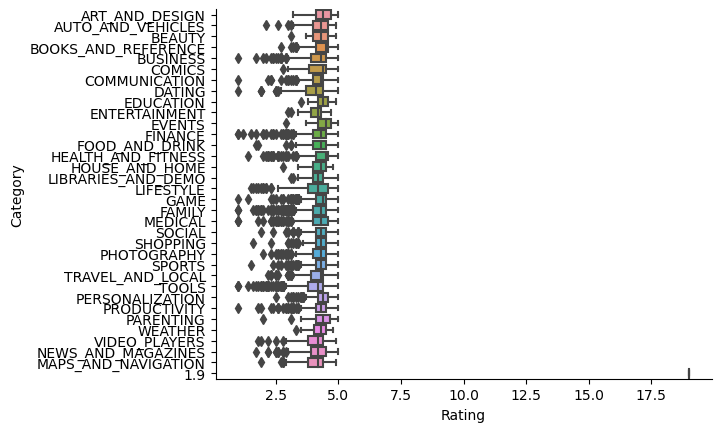

In [6]:
#Q-10
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
# create box plot
sns.boxplot(x="Rating", y="Category", data=df)
sns.despine()


In [7]:
#Q-11:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Rating has a missing value 1474 and it can affect the analysis as rating 
is the important feature for anlyssing the data set.

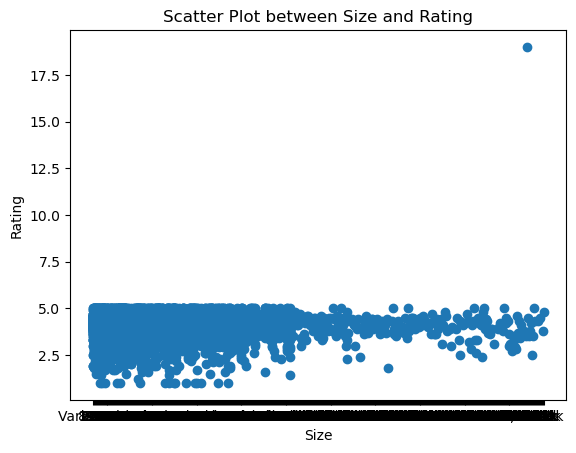

In [8]:
#Q-12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
# Load data
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
plt.scatter(df['Size'], df['Rating'])
plt.title('Scatter Plot between Size and Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()


In [ ]:
#Q-13
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
# Load data
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
plt.bar(df['Size'],df['Price'])
plt.title('Bar Plot between Size and Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [9]:
#Q-14:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
freq_table = df['Installs'].value_counts()

# Show the top 10 most frequent values
print(freq_table.head(10))


1,000,000+     1579
10,000,000+    1252
100,000+       1169
10,000+        1054
1,000+          907
5,000,000+      752
100+            719
500,000+        539
50,000+         479
5,000+          477
Name: Installs, dtype: int64


In [ ]:
#Q-15
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
new_df=df.sort_values(by='Installs', ascending=False)
new_df.head(10)
# The installs is highest for these category 1: Communication, 
#2:News and Magazine,3: Productivity ,4:Tools ,5:Games are the most popular 
#categories so i wil suggest to design an app in these categories

In [ ]:
#Q-16:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

new_df=df.sort_values(by='Rating', ascending=False)
new_df.head(10)



##Based on the rating the sucesfull apps are listed above. According to the annlysis 
1:Ek Bander Ne Kholi Dukan,
2:A Player Essentials
3:Dine In CT - Food Delivery
4:Eternal Light AG
5:BxPort - Bitcoin Bx (Thailand)
6:Ag Valley Cooperative
7:CT Checkout
8:Chenoweth AH
9:Arrowhead AH App
These are most sucessful app according to th information of Ratings given by Users.

In [10]:
#Q-17:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df[['Last Updated']]


,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"
...,...
10836,"July 25, 2017"
10837,"July 6, 2018"
10838,"January 20, 2017"
10839,"January 19, 2015"


In [ ]:
The best time to lunch an app is January of every year.
Which is concluded from the above analysis.